In [9]:
import torch.nn as nn
import torch
import torch.utils.data as Data
from  sklearn.datasets import load_iris
import pandas as pd
import numpy as np
def getdata():
    train_data=load_iris()
    data=train_data['data']
    labels=train_data['target'].reshape(-1,1)
    total_data=np.hstack((data,labels))
    np.random.shuffle(total_data)
    train=total_data[0:100,:-1]
    test=total_data[100:,:-1]
    train_label=total_data[0:100,-1].reshape(-1,1)
    test_label=total_data[100:,-1].reshape(-1,1)
    return data,labels,train,test,train_label,test_label
data,labels,train,test,train_label,test_label = getdata()
# 数据预处理 归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
train=scaler.transform(data)
# 4.对测试数据进行归一化处理
test=scaler.transform(test)

In [2]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.42, min_samples=5)
y_pred = dbscan.fit_predict(data)
y_true = labels.reshape(1,-1)[0]
accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
print(accuracy)

0.7866666666666666



Bad key savefig.frameon in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/sk49/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get an update

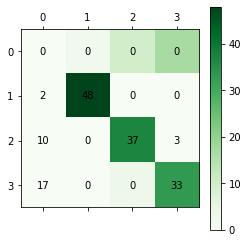

In [3]:
# 衡量模型性能

#true↓ predict→
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_pred, y_true)
#print(cm)
plt.matshow(cm,cmap=plt.cm.Greens)
plt.colorbar()
for x in range(len(cm)):
    for y in range(len(cm)):
        plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')

In [4]:
# 分类报告
r = sm.classification_report(y_true, y_pred)
print('分类报告为：', r, sep='\n')

分类报告为：
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       1.00      0.96      0.98        50
           1       1.00      0.74      0.85        50
           2       0.92      0.66      0.77        50

   micro avg       0.79      0.79      0.79       150
   macro avg       0.73      0.59      0.65       150
weighted avg       0.97      0.79      0.87       150



/home/sk49/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [29]:
from sklearn.cluster import DBSCAN
eps_all = []
min_samples_all = []
acc_all = []
for eps in range(20, 100, 1):
    for min_samples in range(3, 8):
        dbscan = DBSCAN(eps=eps/100.00, min_samples=min_samples)
        y_pred = dbscan.fit_predict(data)
        y_true = labels.reshape(1,-1)[0]
        accuracy = float((y_pred == y_true).astype(int).sum()) / (len(y_true))
        eps_all.append(eps)
        min_samples_all.append(min_samples)
        acc_all.append(accuracy)
        #print("accuracy = ", accuracy)

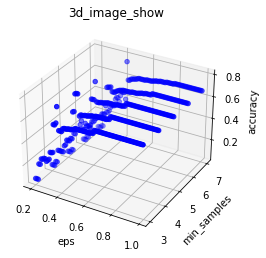

In [28]:
# 实例：
# 首先，还是需要取坐标
import numpy as np   # 假设，m是给定的三维散点序列
x = np.array(eps_all)/100.00
y = np.array(min_samples_all)
z = np.array(acc_all)
#print(x)
#print(y)
#print(z)

# 然后正常画图
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

ax = plt.subplot(projection = '3d')  # 创建一个三维的绘图工程
ax.set_title('3d_image_show')  # 设置本图名称
ax.scatter(x, y, z, c = 'blue')   # 绘制数据点 c: 'r'红色，'y'黄色，等颜色

ax.set_xlabel('eps')  # 设置x坐标轴
ax.set_ylabel('min_samples')  # 设置y坐标轴
ax.set_zlabel('accuracy')  # 设置z坐标轴

plt.show()